# Exploratory data analysis (EDA)

Data was downloaded from Kaggle, direct link:
https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

This database consist of 299 rows and 13 columns:
- Age (Integer)
- anemia - decrease of red blood cells or hemoglobin (Boolean)
- creatinine phosphokinase - level of the CPK enzyme in the blood (mcg/L)
- diabetes - if the patient has diabetes (Boolean)
- ejection fraction - percentage of blood leaving the heart at each contraction (percentage)
- high blood pressure - if the patient has hypertension (Boolean)
- platelets - platelets in the blood (kiloplatelets/mL)
- serum creatinine - level of serum creatinine in the blood (mg/dL)
- serum sodium - level of serum sodium in the blood (mEq/L)
- sex - woman or man (binary)
- smoking - if the patient smokes or not (Boolean)
- time - follow-up period (days)
- DEATH_EVENT - if the patient deceased during the follow-up period (Boolean)

All boolean predictors were converted to integer with 0 for false and 1 for true
and binary sex column was converted to integer with 0 for woman and 1 for
man by the author.

In [1]:
#import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy import stats

In [2]:
heart_failure_data = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")
heart_failure_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


## Data quality check

Data is complete, without missing or wrong type values. There are no duplicated records.

In [3]:
heart_failure_data.describe(include='all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
heart_failure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
heart_failure_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
heart_failure_data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
heart_failure_data.duplicated().sum()

0

### Correlation check

There are no high correlations in the database. Pairplot below proves how
scattered the data is. It was also checked by calculating Pearson's and
Spearman’s colinearity. For both tests the are no colerations with score higher
than 0.7

In [8]:
#Pearson correlation
corr_P = heart_failure_data.corr("pearson")
corr_P

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [9]:
#Check for correlation higher than 0.7
corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=bool), k=1)).stack().sort_values()
corr_P_tri
corr_P_tri[abs(corr_P_tri)>0.7]

Series([], dtype: float64)

In [10]:
#Spearman correlation
corr_S = heart_failure_data.corr("spearman")
corr_S

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.071924,-0.093078,-0.089657,0.074047,0.105740,-0.052091,0.270561,-0.101716,0.057791,0.030145,-0.197524,0.218125
anaemia,0.071924,1.000000,-0.216116,-0.012729,0.020366,0.038182,-0.035608,-0.016267,0.061405,-0.094769,-0.107290,-0.134652,0.066270
creatinine_phosphokinase,-0.093078,-0.216116,1.000000,0.042308,-0.067839,-0.080724,0.060033,-0.049936,0.016886,0.013298,-0.030351,0.125823,0.023616
diabetes,-0.089657,-0.012729,0.042308,1.000000,-0.011906,-0.012732,0.073829,0.001933,-0.055386,-0.157730,-0.147173,0.029501,-0.001943
ejection_fraction,0.074047,0.020366,-0.067839,-0.011906,1.000000,0.017943,0.053696,-0.177986,0.161695,-0.130792,-0.071748,0.070533,-0.286869
high_blood_pressure,0.105740,0.038182,-0.080724,-0.012732,0.017943,1.000000,0.069021,-0.089692,0.019281,-0.104615,-0.055711,-0.194794,0.079351
platelets,-0.052091,-0.035608,0.060033,0.073829,0.053696,0.069021,1.000000,-0.051028,0.049453,-0.137433,0.004774,-0.006927,-0.046200
serum_creatinine,0.270561,-0.016267,-0.049936,0.001933,-0.177986,-0.089692,-0.051028,1.000000,-0.300413,0.052184,-0.017048,-0.160990,0.370630
serum_sodium,-0.101716,0.061405,0.016886,-0.055386,0.161695,0.019281,0.049453,-0.300413,1.000000,-0.077084,0.008335,0.086393,-0.209837
sex,0.057791,-0.094769,0.013298,-0.157730,-0.130792,-0.104615,-0.137433,0.052184,-0.077084,1.000000,0.445892,-0.017332,-0.004316


In [11]:
#Check for correlation higher than 0.7
corr_S_tri = corr_P.where(np.triu(np.ones(corr_S.shape, dtype=bool), k=1)).stack().sort_values()
corr_S_tri
corr_S_tri[abs(corr_P_tri)>0.7]

Series([], dtype: float64)

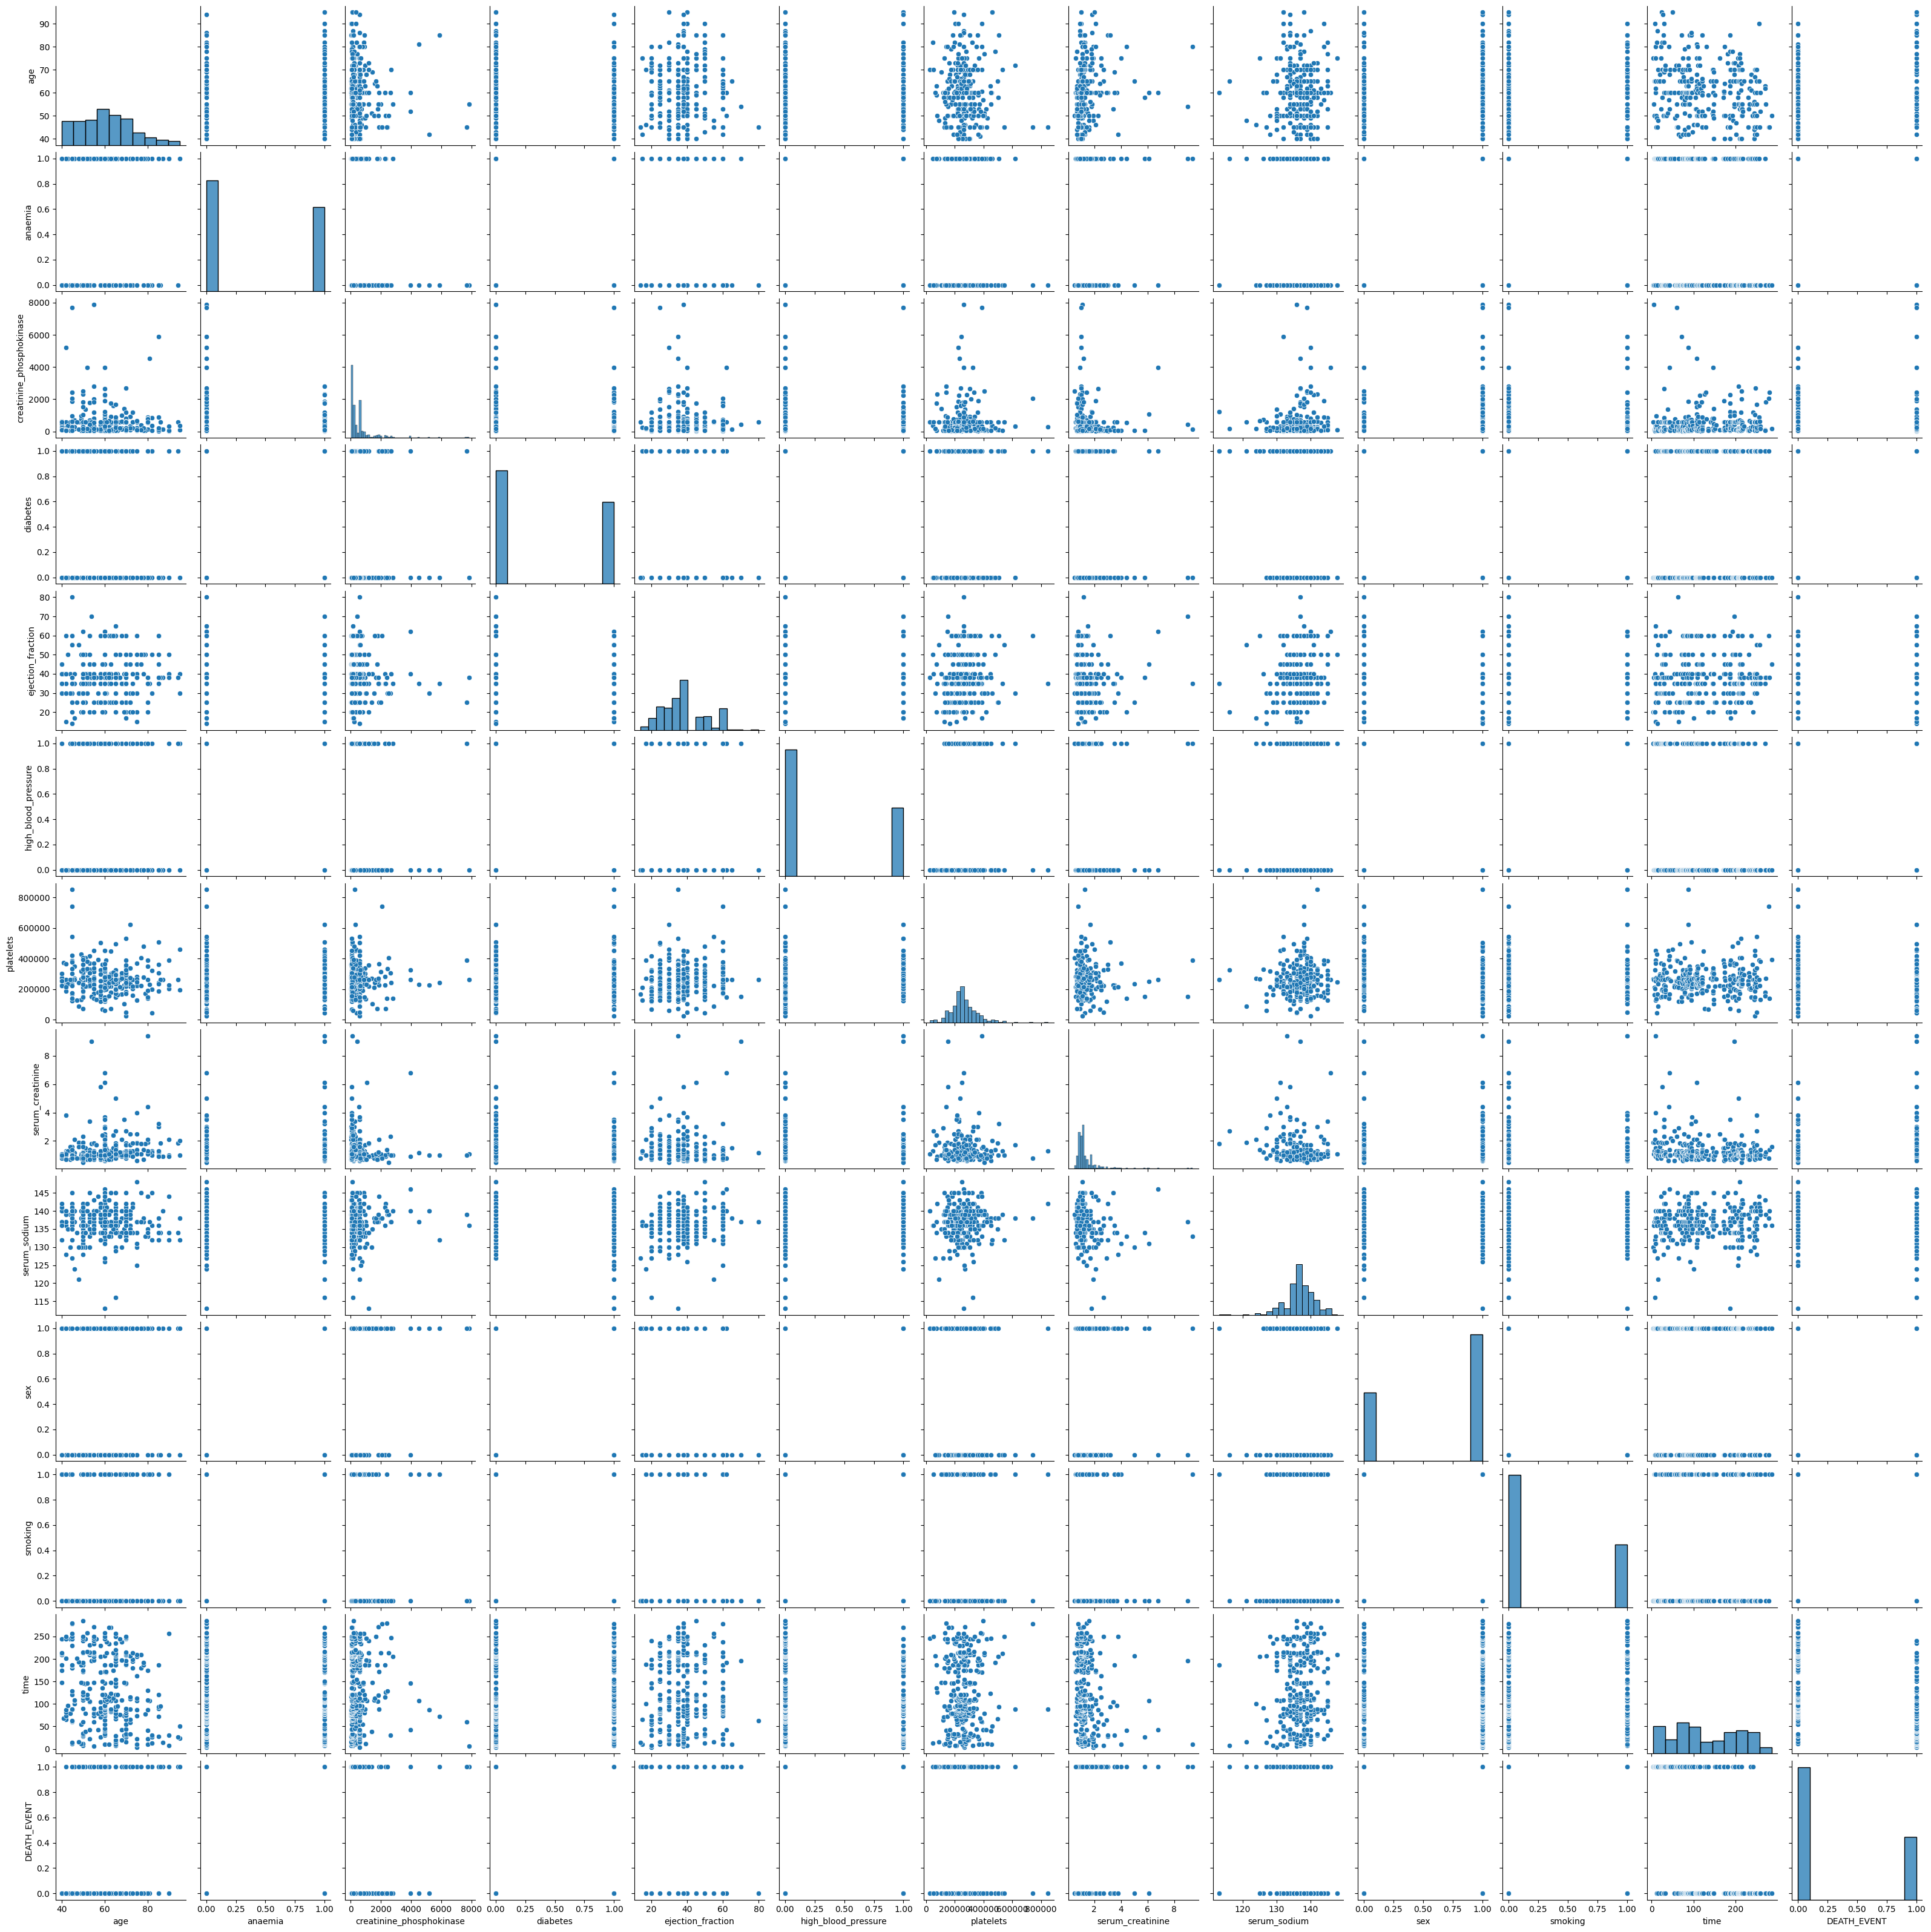

In [12]:
#Pairplot of the variables, with histograms in diagonal
sns.pairplot(heart_failure_data)
plt.show()

### Distribution of the categorical parameters

Patients who did not die and do not have given attribute make up approx 40%
of the database. Given that the overall distribution of DEATH_EVENT is 68%
survieved to 32% died, the algorithm might better predict patients from low
risk group. The data is imbalanced.

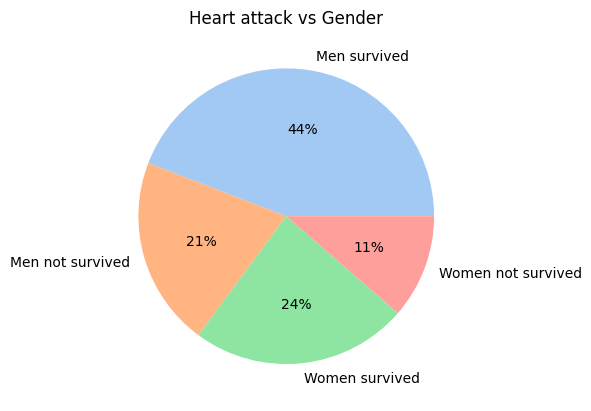

In [13]:
Men = heart_failure_data[heart_failure_data["sex"] == 1]
Women = heart_failure_data[heart_failure_data["sex"] == 0]
Men_survived = Men[Men["DEATH_EVENT"] == 0]
Men_not_survived = Men[Men["DEATH_EVENT"] == 1]
Women_survived = Women[Women["DEATH_EVENT"] == 0]
Women_not_survived = Women[Women["DEATH_EVENT"] == 1]

labels = ['Men survived','Men not survived', "Women survived", "Women not survived"]
data = [len(Men_survived),len(Men_not_survived), len(Women_survived),len(Women_not_survived)]
plt.pie(data, labels = labels, colors = sns.color_palette('pastel')[0:5], autopct='%.0f%%')
plt.title("Heart attack vs Gender")
plt.show()

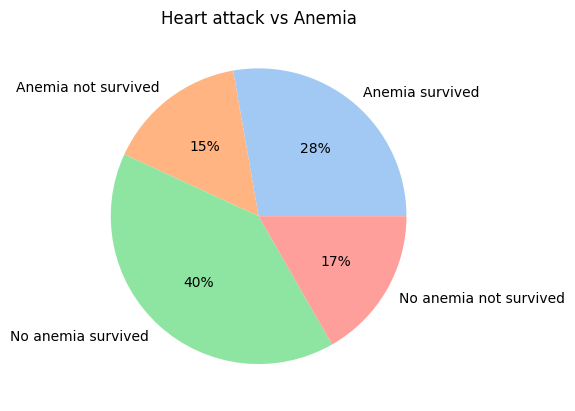

In [14]:
anaemia = heart_failure_data[heart_failure_data["anaemia"] == 1]
no_anaemia = heart_failure_data[heart_failure_data["anaemia"] == 0]
anaemia_survived = anaemia[anaemia["DEATH_EVENT"] == 0]
anaemia_not_survived = anaemia[anaemia["DEATH_EVENT"] == 1]
no_anaemia_survived = no_anaemia[no_anaemia["DEATH_EVENT"] == 0]
no_anaemia_not_survived = no_anaemia[no_anaemia["DEATH_EVENT"] == 1]

labels = ['Anemia survived','Anemia not survived', "No anemia survived", "No anemia not survived"]
data = [len(anaemia_survived),len(anaemia_not_survived), len(no_anaemia_survived),len(no_anaemia_not_survived)]
plt.pie(data, labels = labels, colors = sns.color_palette('pastel')[0:5], autopct='%.0f%%')
plt.title("Heart attack vs Anemia")
plt.show()

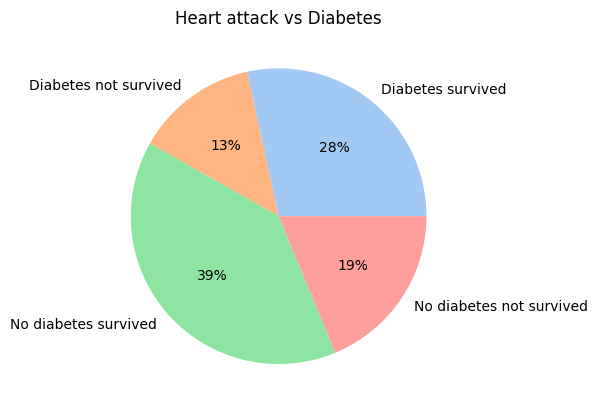

In [15]:
diabetes = heart_failure_data[heart_failure_data["diabetes"] == 1]
no_diabetes = heart_failure_data[heart_failure_data["diabetes"] == 0]
diabetes_survived = diabetes[diabetes["DEATH_EVENT"] == 0]
diabetes_not_survived = diabetes[diabetes["DEATH_EVENT"] == 1]
no_diabetes_survived = no_diabetes[no_diabetes["DEATH_EVENT"] == 0]
no_diabetes_not_survived = no_diabetes[no_diabetes["DEATH_EVENT"] == 1]

labels = ['Diabetes survived','Diabetes not survived', "No diabetes survived", "No diabetes not survived"]
data = [len(diabetes_survived),len(diabetes_not_survived), len(no_diabetes_survived),len(no_diabetes_not_survived)]
plt.pie(data, labels = labels, colors = sns.color_palette('pastel')[0:5], autopct='%.0f%%')
plt.title("Heart attack vs Diabetes")
plt.show()

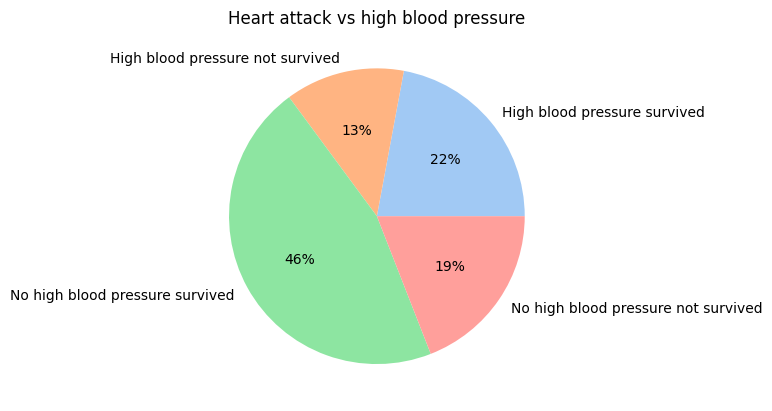

In [16]:
high_blood_pressure = heart_failure_data[heart_failure_data["high_blood_pressure"] == 1]
no_high_blood_pressure = heart_failure_data[heart_failure_data["high_blood_pressure"] == 0]
high_blood_pressure_survived = high_blood_pressure[high_blood_pressure["DEATH_EVENT"] == 0]
high_blood_pressure_not_survived = high_blood_pressure[high_blood_pressure["DEATH_EVENT"] == 1]
no_high_blood_pressure_survived = no_high_blood_pressure[no_high_blood_pressure["DEATH_EVENT"] == 0]
no_high_blood_pressure_not_survived = no_high_blood_pressure[no_high_blood_pressure["DEATH_EVENT"] == 1]

labels = ['High blood pressure survived','High blood pressure not survived', "No high blood pressure survived", "No high blood pressure not survived"]
data = [len(high_blood_pressure_survived),len(high_blood_pressure_not_survived), len(no_high_blood_pressure_survived),len(no_high_blood_pressure_not_survived)]
plt.pie(data, labels = labels, colors = sns.color_palette('pastel')[0:5], autopct='%.0f%%')
plt.title("Heart attack vs high blood pressure")
plt.show()

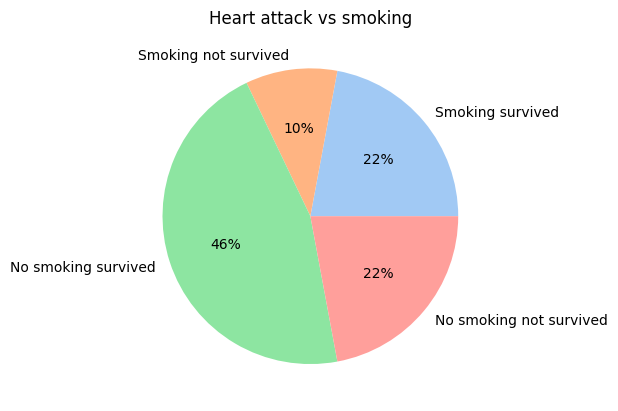

In [17]:
smoking = heart_failure_data[heart_failure_data["smoking"] == 1]
no_smoking = heart_failure_data[heart_failure_data["smoking"] == 0]
smoking_survived = smoking[smoking["DEATH_EVENT"] == 0]
smoking_not_survived = smoking[smoking["DEATH_EVENT"] == 1]
no_smoking_survived = no_smoking[no_smoking["DEATH_EVENT"] == 0]
no_smoking_not_survived = no_smoking[no_smoking["DEATH_EVENT"] == 1]

labels = ['Smoking survived','Smoking not survived', "No smoking survived", "No smoking not survived"]
data = [len(smoking_survived),len(smoking_not_survived), len(no_smoking_survived),len(no_smoking_not_survived)]
plt.pie(data, labels = labels, colors = sns.color_palette('pastel')[0:5], autopct='%.0f%%')
plt.title("Heart attack vs smoking")
plt.show()

## Outliers

The only worrying boxplots are for creatinine phosphokinase, platelets and serum creatinine. The rest doesn’t have any outliers or very few. Even though patients can have such extreme medical exams results influence of the outliers will be checked. Any records with attribute higher or lower than 3 standard deviations from the median will be removed.

### Original data

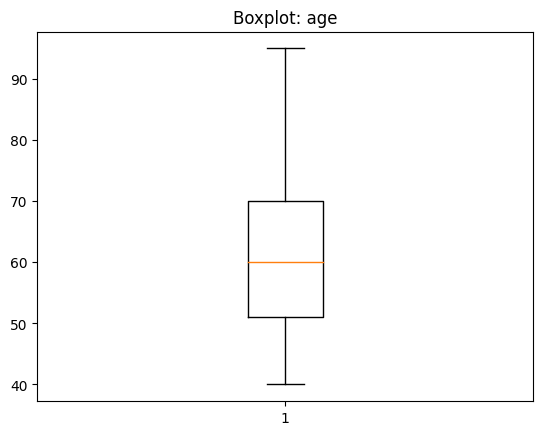

In [18]:
plt.boxplot(heart_failure_data["age"])
plt.title("Boxplot: age")
plt.show()

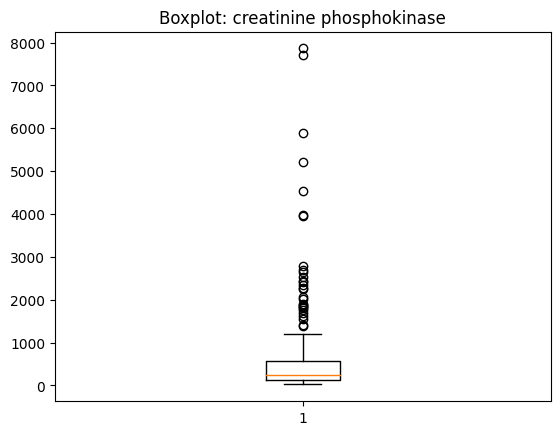

In [19]:
plt.boxplot(heart_failure_data["creatinine_phosphokinase"])
plt.title("Boxplot: creatinine phosphokinase")
plt.show()

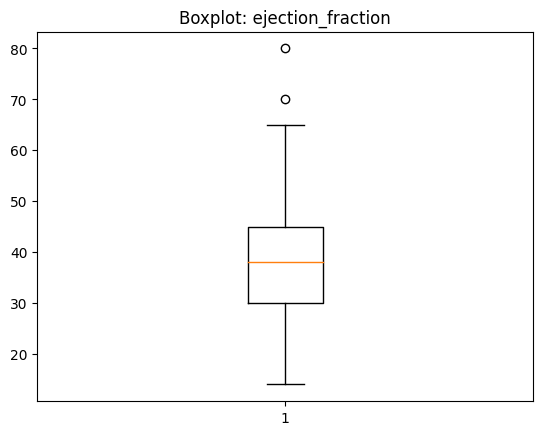

In [20]:
plt.boxplot(heart_failure_data["ejection_fraction"])
plt.title("Boxplot: ejection_fraction")
plt.show()

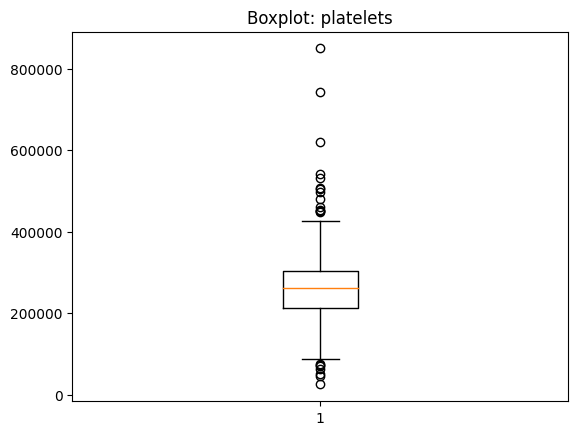

In [21]:
plt.boxplot(heart_failure_data["platelets"])
plt.title("Boxplot: platelets")
plt.show()

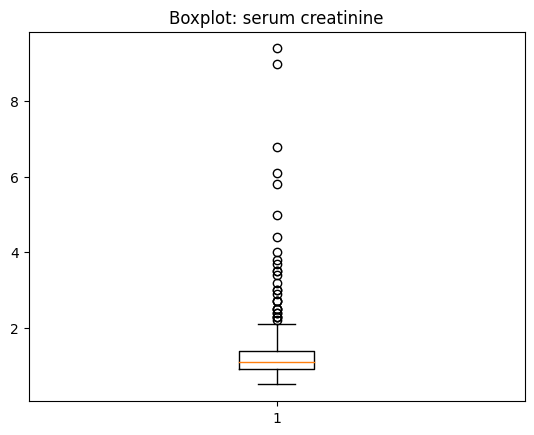

In [22]:
plt.boxplot(heart_failure_data["serum_creatinine"])
plt.title("Boxplot: serum creatinine")
plt.show()

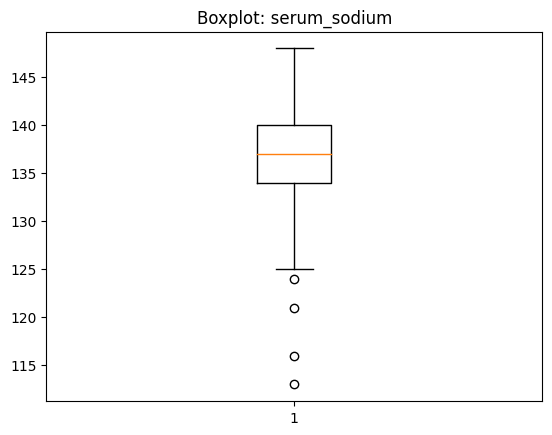

In [23]:
plt.boxplot(heart_failure_data["serum_sodium"])
plt.title("Boxplot: serum_sodium")
plt.show()

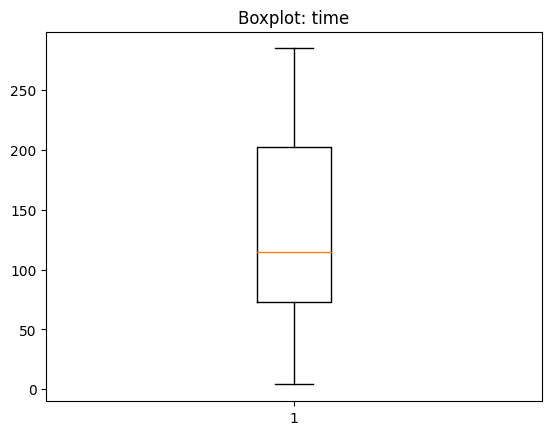

In [24]:
plt.boxplot(heart_failure_data["time"])
plt.title("Boxplot: time")
plt.show()

In [25]:
#remove rows of data that have attribute higher or lower than 3 standard deviations from the median
z_scores = stats.zscore(heart_failure_data)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
heart_failure_data_without_outl = heart_failure_data[filtered_entries]

In [26]:
#number of filltered rows = 19
filtered_entries[filtered_entries == False].shape

(19,)

### Data without outliers

In [27]:
#Statistics for data without outliers
heart_failure_data_without_outl.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,60.972621,0.435714,456.725000,0.417857,37.835714,0.360714,258820.066536,1.275393,136.825000,0.653571,0.314286,132.696429,0.307143
std,11.815337,0.496738,537.107566,0.494089,11.470461,0.481068,85605.349916,0.615743,3.924203,0.476684,0.465062,77.183559,0.462135
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,124.000000,0.000000,0.000000,4.000000,0.000000
25%,51.000000,0.000000,114.500000,0.000000,30.000000,0.000000,210750.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,239.500000,0.000000,38.000000,0.000000,261000.000000,1.100000,137.000000,1.000000,0.000000,119.500000,0.000000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,302000.000000,1.400000,140.000000,1.000000,1.000000,205.250000,1.000000
max,95.000000,1.000000,2794.000000,1.000000,65.000000,1.000000,543000.000000,4.400000,148.000000,1.000000,1.000000,285.000000,1.000000


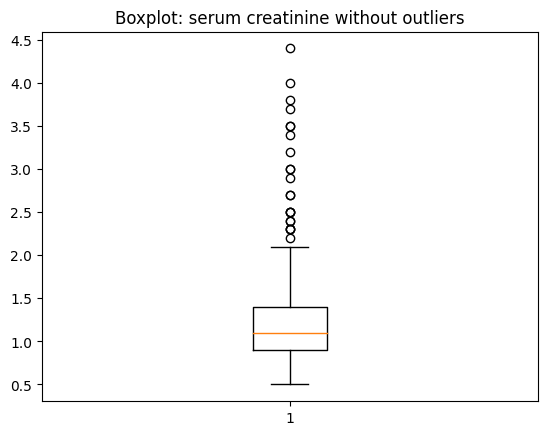

In [28]:
plt.boxplot(heart_failure_data_without_outl["serum_creatinine"])
plt.title("Boxplot: serum creatinine without outliers")
plt.show()

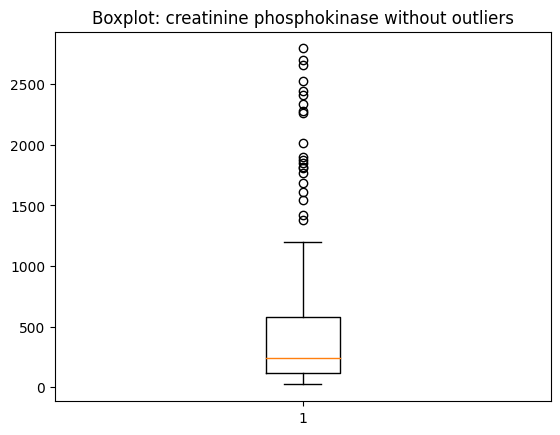

In [29]:
plt.boxplot(heart_failure_data_without_outl["creatinine_phosphokinase"])
plt.title("Boxplot: creatinine phosphokinase without outliers")
plt.show()

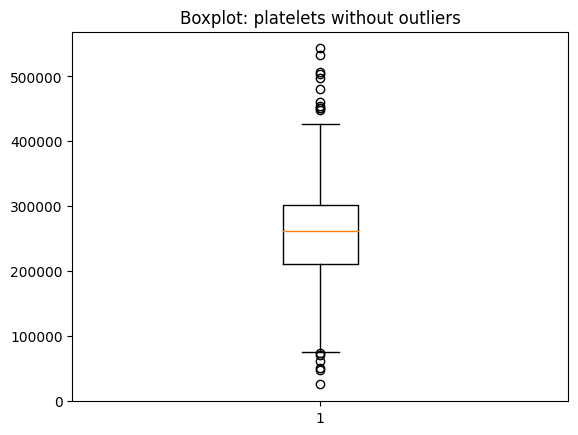

In [30]:
plt.boxplot(heart_failure_data_without_outl["platelets"])
plt.title("Boxplot: platelets without outliers")
plt.show()

In [31]:
heart_failure_data_without_outl.to_csv("data/heart_failure_data_without_outl.csv", index = False)